In [30]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# magic command for matplotlib to enable printing directly in the jupyter notebook
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import plot_confusion_matrix
#from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.utils import resample,shuffle


In [31]:
# PATHS

# get working directory
path_working = Path.cwd()

path_data_binary = str(path_working) + "\\" + "data" + "\\" + "binary" + "\\"

path_data_triple = str(path_working) + "\\" + "data" + "\\" + "triple" + "\\"

path_data_multiclass = str(path_working) + "\\" + "data" + "\\" + "multiclass" + "\\"


In [32]:
def create_dataframe (path):
    # Get the files from the path provided in the OP
    files = Path(path).glob('*.csv')  # .rglob to create iterator for subdirectories
    
    #Find all csv files in directory and concatenate them
    dfs = list()
    names = list()
    for file in files:
        data = pd.read_csv(file)
        # .stem is method for pathlib objects to get the filename without the extension
        # create another column in dataframe for filename
        data['file'] = file.stem
        names.append(file.stem)
        dfs.append(data)
    
    df = pd.concat(dfs, ignore_index=True)
    
    return df


In [33]:
df_raw_binary = create_dataframe(path_data_binary)

In [34]:
df_raw_binary

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       relay1_log  relay2_log  relay3_log  relay4_log  snort_log1  snort_log2  \
0               0           0           0           0           0           0   
1               0           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
78372           0           0           0           0           0           0   
78373           0           0           0           0           0           0   
78374           0           0           0           0           0           0   
78375           0           0           0           0           0           0   
78376           0           0           0           0           0           0   

       snort_log3  snort_log4   marker   file  
0               0           0  Natural  data1  
1               0           0  Natural  data1  
2               0           0  Natural  data1  
3               0           0  Natural  data1  
4               0           0  Natural  data1  
...           ...         ...      ...    ...  
78372           0           0  Natural  data9  
78373           0           0  Natural  data9  
78374           0           0  Natural  data9  
78375           0           0  Natural  data9  
78376           0           0  Natural  data9  

[78377 rows x 130 columns]

In [35]:
#drop last column taht shows csv filename source:
del df_raw_binary[df_raw_binary.columns[-1]]

df_raw_binary

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4   marker  
0               0           0           0           0  Natural  
1               0           0           0           0  Natural  
2               0           0           0           0  Natural  
3               0           0           0           0  Natural  
4               0           0           0           0  Natural  
...           ...         ...         ...         ...      ...  
78372           0           0           0           0  Natural  
78373           0           0           0           0  Natural  
78374           0           0           0           0  Natural  
78375           0           0           0           0  Natural  
78376           0           0           0           0  Natural  

[78377 rows x 129 columns]

In [7]:
print(df_raw_binary.shape)

df_raw_binary['marker'].value_counts()

(78377, 129)


Attack     55663
Natural    22714
Name: marker, dtype: int64

### ---> unbalanced classes

In [8]:
df_raw_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 77.1+ MB


In [9]:
df_raw_binary.describe()

R1-PA1:VH       R1-PM1:V     R1-PA2:VH       R1-PM2:V     R1-PA3:VH  \
count  78377.000000   78377.000000  78377.000000   78377.000000  78377.000000   
mean     -15.802424  130764.039577      2.175196  131035.528095      6.834315   
std      100.876750    8546.118477    111.743169    5393.135370     97.065063   
min     -179.988962       0.000000   -179.994691       0.000000   -179.994691   
25%     -100.416583  131057.982300   -102.129727  130732.029800    -69.459673   
50%      -28.865614  131684.814000      8.118812  131358.861500     13.401483   
75%       68.096034  132186.279400    104.897113  131885.400200     85.324875   
max      179.994691  151592.990400    179.994691  151567.917200    179.988962   

            R1-PM3:V     R1-PA4:IH      R1-PM4:I     R1-PA5:IH      R1-PM5:I  \
count   78377.000000  78377.000000  78377.000000  78377.000000  78377.000000   
mean   131395.717581    -14.334996    393.949321      3.538540    387.438133   
std      5443.752388     99.601107    190.966011    109.504977    151.277183   
min         0.000000   -179.994691      0.000000   -179.994691      0.000000   
25%    131133.202100    -98.159129    305.793700    -94.790138    311.836330   
50%    131760.033900    -23.514188    378.671480      1.885031    383.249230   
75%    132261.499300     66.274028    456.676340    102.674037    460.338540   
max    151693.283500    179.994691   1779.462980    179.994691   1265.656320   

       ...  control_panel_log3  control_panel_log4    relay1_log  \
count  ...        78377.000000        78377.000000  78377.000000   
mean   ...            0.000026            0.000026      0.035916   
std    ...            0.005051            0.005051      0.186082   
min    ...            0.000000            0.000000      0.000000   
25%    ...            0.000000            0.000000      0.000000   
50%    ...            0.000000            0.000000      0.000000   
75%    ...            0.000000            0.000000      0.000000   
max    ...            1.000000            1.000000      1.000000   

         relay2_log    relay3_log    relay4_log    snort_log1    snort_log2  \
count  78377.000000  78377.000000  78377.000000  78377.000000  78377.000000   
mean       0.026436      0.026500      0.035597      0.000051      0.000051   
std        0.160430      0.160618      0.185285      0.007144      0.007144   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         snort_log3    snort_log4  
count  78377.000000  78377.000000  
mean       0.000089      0.000077  
std        0.009450      0.008749  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 128 columns]

In [10]:
# Look at datatypes of coloumns.
def show_dtypes(df):
    for index in range(len(df.dtypes)):
        print(f'{df.columns[index]} -> {df.dtypes[index]}' )
        
show_dtypes(df_raw_binary)

R1-PA1:VH -> float64
R1-PM1:V -> float64
R1-PA2:VH -> float64
R1-PM2:V -> float64
R1-PA3:VH -> float64
R1-PM3:V -> float64
R1-PA4:IH -> float64
R1-PM4:I -> float64
R1-PA5:IH -> float64
R1-PM5:I -> float64
R1-PA6:IH -> float64
R1-PM6:I -> float64
R1-PA7:VH -> float64
R1-PM7:V -> float64
R1-PA8:VH -> float64
R1-PM8:V -> float64
R1-PA9:VH -> float64
R1-PM9:V -> float64
R1-PA10:IH -> float64
R1-PM10:I -> float64
R1-PA11:IH -> float64
R1-PM11:I -> float64
R1-PA12:IH -> float64
R1-PM12:I -> float64
R1:F -> float64
R1:DF -> float64
R1-PA:Z -> float64
R1-PA:ZH -> float64
R1:S -> int64
R2-PA1:VH -> float64
R2-PM1:V -> float64
R2-PA2:VH -> float64
R2-PM2:V -> float64
R2-PA3:VH -> float64
R2-PM3:V -> float64
R2-PA4:IH -> float64
R2-PM4:I -> float64
R2-PA5:IH -> float64
R2-PM5:I -> float64
R2-PA6:IH -> float64
R2-PM6:I -> float64
R2-PA7:VH -> float64
R2-PM7:V -> float64
R2-PA8:VH -> float64
R2-PM8:V -> float64
R2-PA9:VH -> float64
R2-PM9:V -> float64
R2-PA10:IH -> float64
R2-PM10:I -> float64
R2-P

In [11]:
# .copy() is very important otherwise its just a pointer
df = df_raw_binary.copy()

In [12]:
def marker_to_numeric_binary(x):
        if x=='Attack': return 0
        if x=='Natural': return 1
     
        
LABEL_MAP = {0 : "Attack", 1: "Natural"}

LABELNAMES = [LABEL_MAP[key] for key in LABEL_MAP]

df['marker'] = df['marker'].apply(marker_to_numeric_binary)
df

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4  marker  
0               0           0           0           0       1  
1               0           0           0           0       1  
2               0           0           0           0       1  
3               0           0           0           0       1  
4               0           0           0           0       1  
...           ...         ...         ...         ...     ...  
78372           0           0           0           0       1  
78373           0           0           0           0       1  
78374           0           0           0           0       1  
78375           0           0           0           0       1  
78376           0           0           0           0       1  

[78377 rows x 129 columns]

## EDIT
It's generally a good idea to clean your data before using the .describe() function or any other data analysis technique. Cleaning your data involves identifying and handling missing or invalid values, dealing with outliers, and converting data types as necessary.

If you don't clean your data before analyzing it, you may end up with inaccurate or misleading results. For example, missing values can skew summary statistics such as the mean and standard deviation, and outliers can affect the distribution of the data.

In [36]:
# Check for infinite float entries
# "np.finfo(np.float64).max" returns the maximum finite value that can be represented by a 64-bit floating point number
# "df.values >= np.finfo(np.float64).max" returns a bollean array where "np.finfo(np.float64).max" is checked
# "np.where(df.values >= np.finfo(np.float64).max)" returns a array of indices where "df.values >= np.finfo(np.float64).max" is true

np.where(df.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

### ----> we have infinite float entries

In [14]:
# Check for NaN values
np.isnan(df.values.any())

False

### ----> we have no NaN values in the dataframe

In [15]:
# Replace infinite updated data with nan

# "[np.inf, -np.inf]" specifies the values to be replaced
# "np.nan" specifies the value to replace the infinite values with.
# "inplace=True" modifies the Dataframe in place, so that the original df is updated the new values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)

print(df.shape)

df['marker'].value_counts()

(72073, 129)


0    51445
1    20628
Name: marker, dtype: int64

### ----> Due to cleaning up NaNs and infinites we lost about 6000 datapoints, which is not very harmful due to the fact that there are still 72000 rows

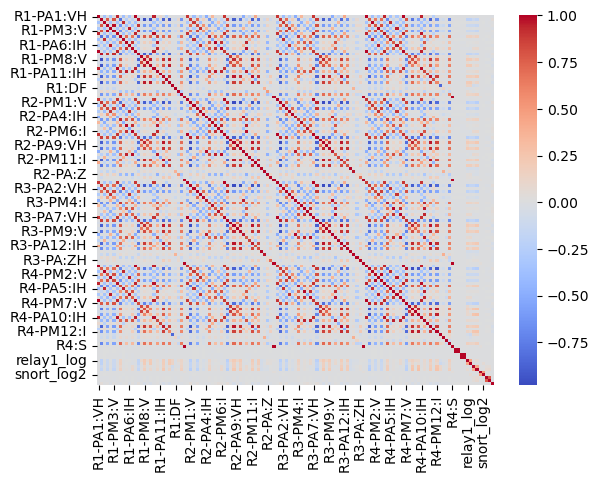

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

#This only copies a Series Object, no pandas Dataframe!
df_marker = df["marker"].copy()
#Converting to Pandas Dataframe
df_marker = pd.DataFrame(df_marker)

#Delete Marker column because "marker" should not be normalized
df_nomarker = df.copy()
del df_nomarker[df_nomarker.columns[-1]]

#Initialize SCaler
scaler = StandardScaler()
#Scale data
data_normalized = scaler.fit_transform(df_nomarker)
#insert normalized data in former pandas frame
df_normalized_nomark = pd.DataFrame(data_normalized, columns=df_nomarker.columns)

#concat "marker" column with normalized rest dataframe, index of marker frame is overwritten
df_normalized = pd.concat([df_normalized_nomark, df_marker.set_index(df_normalized_nomark.index)], axis=1)

#print(df_normalized_nomark)

#print(isinstance(df, pd.DataFrame))

#print(isinstance(df_marker, pd.DataFrame))

#print(df_normalized)

In [18]:
df_normalized

R1-PA1:VH  R1-PM1:V  R1-PA2:VH  R1-PM2:V  R1-PA3:VH  R1-PM3:V  \
0       0.852157 -0.518240  -0.462850 -1.773135  -1.812706 -1.832238   
1       0.884735 -0.126254  -0.433586 -0.513119  -1.778744 -0.614314   
2       0.885189 -0.122485  -0.433176 -0.501004  -1.778273 -0.602715   
3       0.888651 -0.081025  -0.429999 -0.367733  -1.774676 -0.475123   
4       0.893305 -0.005643  -0.425745 -0.125422  -1.769959 -0.243137   
...          ...       ...        ...       ...        ...       ...   
72068  -0.428984 -0.062179  -1.619687 -0.307155   0.561076 -0.417126   
72069  -0.429835 -0.009412  -1.620507 -0.137538   0.560133 -0.266336   
72070  -0.429949 -0.005643  -1.620609 -0.137538   0.560074 -0.254736   
72071  -0.430403 -0.001874  -1.621019 -0.125422   0.559602 -0.243137   
72072  -0.431651  0.005665  -1.622096 -0.101191   0.558305 -0.219938   

       R1-PA4:IH  R1-PM4:I  R1-PA5:IH  R1-PM5:I  ...  control_panel_log4  \
0       0.796566  1.533650  -0.540853  2.788930  ...           -0.003725   
1       0.857249  0.660454  -0.486641  1.328263  ...           -0.003725   
2       0.857023  0.660454  -0.486333  1.328263  ...           -0.003725   
3       0.860419  0.655225  -0.482076  1.307002  ...           -0.003725   
4       0.860080  0.666990  -0.478281  1.289993  ...           -0.003725   
...          ...       ...        ...       ...  ...                 ...   
72068  -0.446705  0.382025   1.570038  0.735067  ...           -0.003725   
72069  -0.460121  0.433005   1.561525  0.790347  ...           -0.003725   
72070  -0.460404  0.434312   1.561525  0.790347  ...           -0.003725   
72071  -0.463404  0.444769   1.560345  0.794599  ...           -0.003725   
72072  -0.469405  0.459148   1.556857  0.807356  ...           -0.003725   

       relay1_log  relay2_log  relay3_log  relay4_log  snort_log1  snort_log2  \
0        -0.03249   -0.031402   -0.030275   -0.035162    -0.00745    -0.00745   
1        -0.03249   -0.031402   -0.030275   -0.035162    -0.00745    -0.00745   
2        -0.03249   -0.031402   -0.030275   -0.035162    -0.00745    -0.00745   
3        -0.03249   -0.031402   -0.030275   -0.035162    -0.00745    -0.00745   
4        -0.03249   -0.031402   -0.030275   -0.035162    -0.00745    -0.00745   
...           ...         ...         ...         ...         ...         ...   
72068    -0.03249   -0.031402   -0.030275   -0.035162    -0.00745    -0.00745   
72069    -0.03249   -0.031402   -0.030275   -0.035162    -0.00745    -0.00745   
72070    -0.03249   -0.031402   -0.030275   -0.035162    -0.00745    -0.00745   
72071    -0.03249   -0.031402   -0.030275   -0.035162    -0.00745    -0.00745   
72072    -0.03249   -0.031402   -0.030275   -0.035162    -0.00745    -0.00745   

       snort_log3  snort_log4  marker  
0       -0.009856   -0.009124       1  
1       -0.009856   -0.009124       1  
2       -0.009856   -0.009124       1  
3       -0.009856   -0.009124       1  
4       -0.009856   -0.009124       1  
...           ...         ...     ...  
72068   -0.009856   -0.009124       1  
72069   -0.009856   -0.009124       1  
72070   -0.009856   -0.009124       1  
72071   -0.009856   -0.009124       1  
72072   -0.009856   -0.009124       1  

[72073 rows x 129 columns]

In [22]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=10)

# Fit the PCA model to the data
pca.fit(df_normalized_nomark)

# Transform the data onto the new feature space
df_normalized_nomark_transformed = pca.transform(df_normalized_nomark)

# Create a new DataFrame with the transformed features and column names
pca_columns = ['PC{}'.format(i+1) for i in range(10)]
pca_df = pd.DataFrame(df_normalized_nomark_transformed, columns=pca_columns)

# Concatenate the label column to the PCA DataFrame
#pca_df = pd.concat([pca_df, df_marker], axis=1)

#concat "marker" column with normalized rest dataframe, index of marker frame is overwritten
pca_df = pd.concat([pca_df, df_marker.set_index(df_normalized_nomark.index)], axis=1)

# Inspect the new DataFrame
#print(pca_df.head())


In [23]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      7.410035  5.878041 -7.866633 -2.669071 -0.601143  1.528115 -0.382533   
1      2.864302  5.816602 -3.542110 -2.114874 -0.520201  0.418078 -0.174685   
2      2.852316  5.816359 -3.540991 -2.115164 -0.519729  0.397407 -0.169685   
3      2.625653  5.844410 -3.504541 -2.095474 -0.527476  0.114328 -0.104195   
4      2.241360  5.853985 -3.499135 -2.097993 -0.543639 -0.428555  0.024751   
...         ...       ...       ...       ...       ...       ...       ...   
72068  1.410301 -2.612450 -3.173176  0.879996  0.033256  0.071603 -0.046588   
72069  1.284755 -2.498356 -3.207788  0.561158  0.002858 -0.099238 -0.014220   
72070  1.278727 -2.498169 -3.206126  0.561190  0.002914 -0.112504 -0.011140   
72071  1.284549 -2.499468 -3.210743  0.559902  0.003710 -0.135932 -0.005495   
72072  1.300272 -2.501314 -3.235100  0.554898  0.004041 -0.186845  0.007006   

            PC8       PC9      PC10  marker  
0      2.740336 -2.527897  1.709157       1  
1      2.922117 -2.535730  0.667662       1  
2      2.918821 -2.535519  0.662998       1  
3      2.969881 -2.553654  0.605149       1  
4      3.000159 -2.542043  0.492106       1  
...         ...       ...       ...     ...  
72068 -0.170092 -0.549837  0.032839       1  
72069 -0.520889  0.300105 -0.211975       1  
72070 -0.519715  0.300024 -0.213808       1  
72071 -0.515648  0.298619 -0.221989       1  
72072 -0.506651  0.295297 -0.234825       1  

[72073 rows x 11 columns]

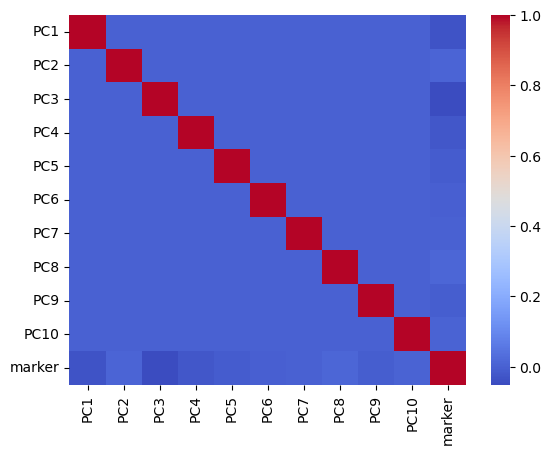

In [24]:
# Calculate the correlation matrix
corr_matrix = pca_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

In [25]:
df_R1 = df.iloc[:, 0:29]

df_R2 = df.iloc[:, 30:58]

df_R3 = df.iloc[:, 59:87]

df_R4 = df.iloc[:, 88:116]

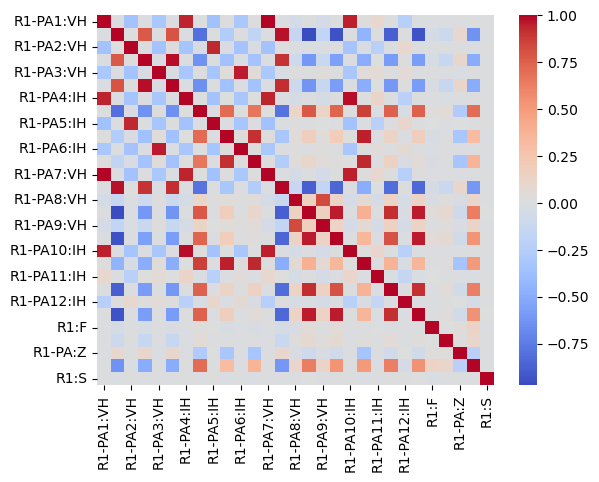

In [26]:
# Calculate the correlation matrix
corr_matrix = df_R1.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

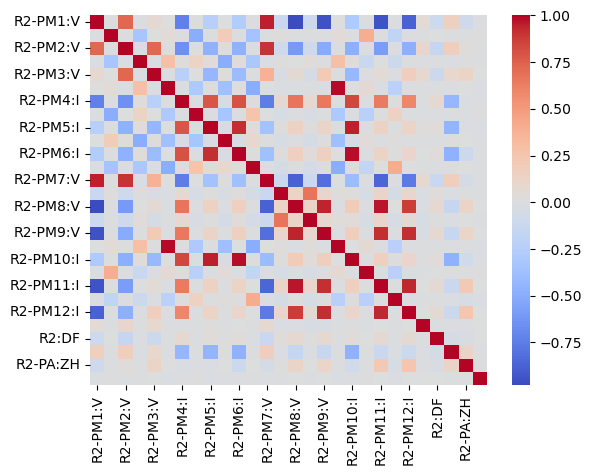

In [27]:
# Calculate the correlation matrix
corr_matrix = df_R2.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

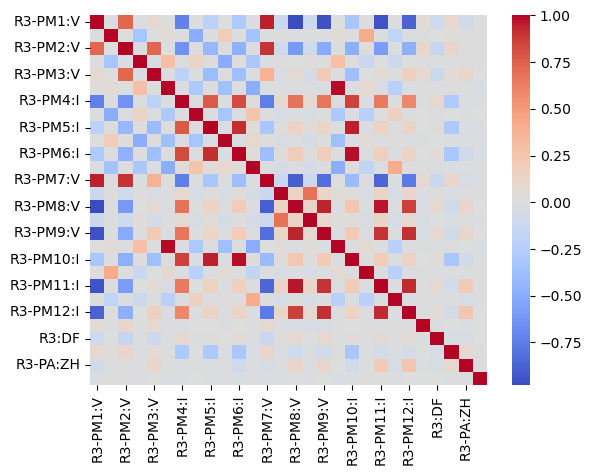

In [28]:
# Calculate the correlation matrix
corr_matrix = df_R3.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

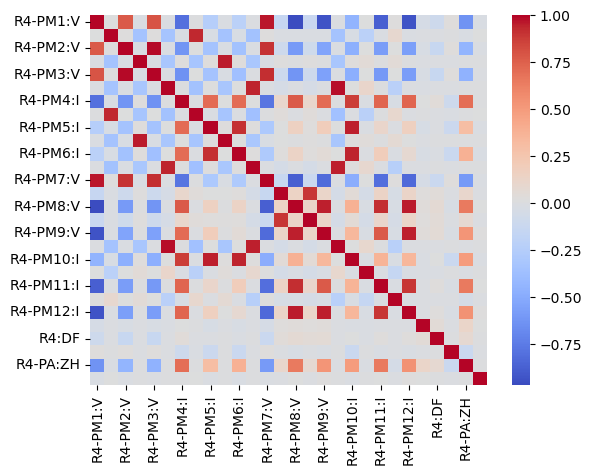

In [29]:
# Calculate the correlation matrix
corr_matrix = df_R4.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm")

# Show the plot
plt.show()

In [ ]:
# set the maximum number of columns to display
pd.options.display.max_columns = None

In [ ]:
df_R1

In [ ]:
df_R1.describe()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a box plot of a single column
column_name = 'R1-PM1:V'
df[[column_name]].boxplot()

# Set the title and axis labels
plt.title('Box plot of ' + column_name)
plt.ylabel(column_name)

# Show the plot
plt.show()

In [ ]:
# Create a histogram
df[column_name].hist()

# Set the title and axis labels
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
df_R2

In [ ]:
df_R3

In [ ]:
df_R4